In [ ]:
# STEP 3: Load and clean the dataset
df = pd.read_csv("/content/creditcard (1).csv")
df = df.dropna()  # Remove missing values

In [ ]:
# STEP 1: Install
# !pip install tensorflow scikit-learn pandas matplotlib

# STEP 2: Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
import matplotlib.pyplot as plt


In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45640,42436,1.330967,0.662949,-1.089077,0.425743,0.946620,-0.324689,0.366117,-0.157143,-0.528674,...,-0.176830,-0.418278,-0.279397,-1.107096,0.765716,0.431469,-0.027864,0.021672,0.76,0.0
45641,42436,-2.481639,-2.439949,0.363642,1.216827,2.572442,-1.264220,-0.443652,0.075853,0.073188,...,-0.039426,0.480591,1.779358,-0.756700,-0.161099,0.685617,0.223071,0.139619,0.00,0.0
45642,42436,1.223475,0.014944,0.471312,-0.038410,-0.566793,-0.867970,-0.058213,-0.144080,0.164904,...,-0.053292,-0.093680,0.106348,0.471407,0.135555,0.968336,-0.065171,0.005184,7.49,0.0
45643,42436,1.258657,0.421016,0.325437,0.684259,-0.292529,-1.052786,0.145228,-0.253567,-0.100521,...,-0.278029,-0.757417,0.119613,0.369393,0.246145,0.091553,-0.017156,0.032557,0.89,0.0


In [ ]:
# Normalize 'Amount' and drop 'Time'
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time'], axis=1)

In [ ]:
# Prepare features and labels
X = df.drop('Class', axis=1).values
y = df['Class'].values


In [ ]:

# STEP 4: Train Autoencoder on normal (non-fraud) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_nonfraud = X_train[y_train == 0]

input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dropout(0.3)(encoded)
encoded = Dense(16, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')


In [ ]:
# Train autoencoder
autoencoder.fit(X_train_nonfraud, X_train_nonfraud,
                epochs=10, batch_size=64, shuffle=True,
                validation_split=0.1, verbose=1)


Epoch 1/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.8194 - val_loss: 0.3755
Epoch 2/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4621 - val_loss: 0.2872
Epoch 3/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3710 - val_loss: 0.2480
Epoch 4/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3548 - val_loss: 0.2238
Epoch 5/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3388 - val_loss: 0.2041
Epoch 6/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3203 - val_loss: 0.1894
Epoch 7/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3096 - val_loss: 0.1859
Epoch 8/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3015 - val_loss: 0.1698
Epoch 9/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2921 - val_loss: 0.1642
Epoch 10/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2958 - val_loss: 0.1603


In [ ]:
# STEP 5: Create reconstruction error feature
X_reconstructed = autoencoder.predict(X)
recon_error = np.mean(np.power(X - X_reconstructed, 2), axis=1)
df['recon_error'] = recon_error


1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


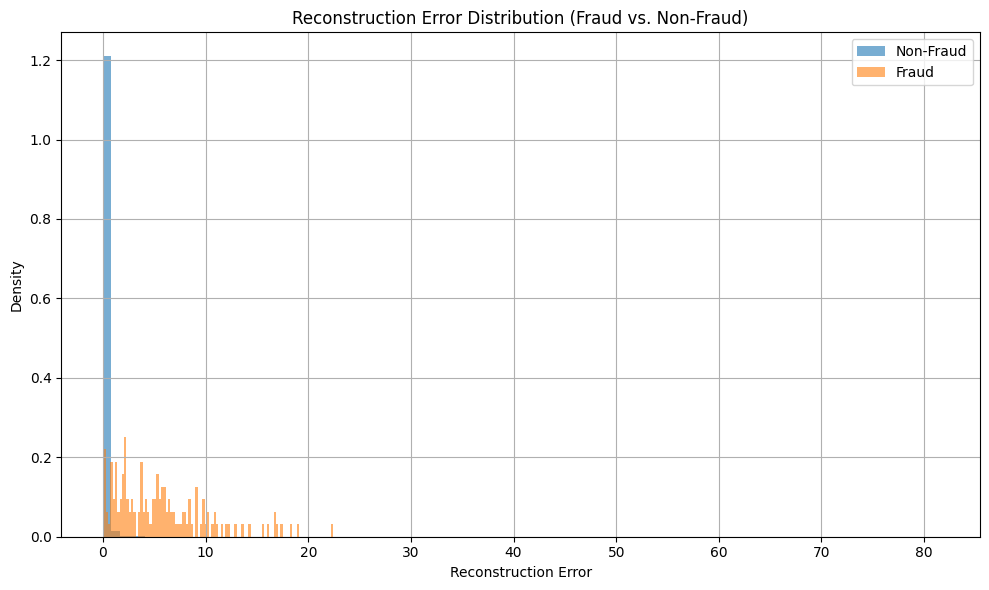

In [ ]:
import matplotlib.pyplot as plt

# Separate reconstruction error by class
recon_error_fraud = df[df['Class'] == 1]['recon_error']
recon_error_nonfraud = df[df['Class'] == 0]['recon_error']

# Plotting the histograms
plt.figure(figsize=(10, 6))
plt.hist(recon_error_nonfraud, bins=100, alpha=0.6, label='Non-Fraud', density=True)
plt.hist(recon_error_fraud, bins=100, alpha=0.6, label='Fraud', density=True)
plt.title("Reconstruction Error Distribution (Fraud vs. Non-Fraud)")
plt.xlabel("Reconstruction Error")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# STEP 6: Hybrid model data
X_hybrid = df.drop('Class', axis=1).values
y_hybrid = df['Class'].values
X_train_hybrid, X_test_hybrid, y_train_hybrid, y_test_hybrid = train_test_split(X_hybrid, y_hybrid, test_size=0.2, random_state=42)

 STEP 7: Train a Calibrated Random Forest Classifier
We use a RandomForestClassifier as the base model with class_weight='balanced' to handle fraud class imbalance.
 Then, we wrap it with CalibratedClassifierCV using 'isotonic' calibration to improve probability estimates.
 This helps us get more reliable confidence scores for fraud detection decisions.


In [ ]:

# STEP 7: Calibrated Random Forest
rf = RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42)
calibrated_rf = CalibratedClassifierCV(rf, method='isotonic', cv=3)
calibrated_rf.fit(X_train_hybrid, y_train_hybrid)

CalibratedClassifierCV(cv=3,
                       estimator=RandomForestClassifier(class_weight='balanced',
                                                        n_estimators=300,
                                                        random_state=42),
                       method='isotonic')

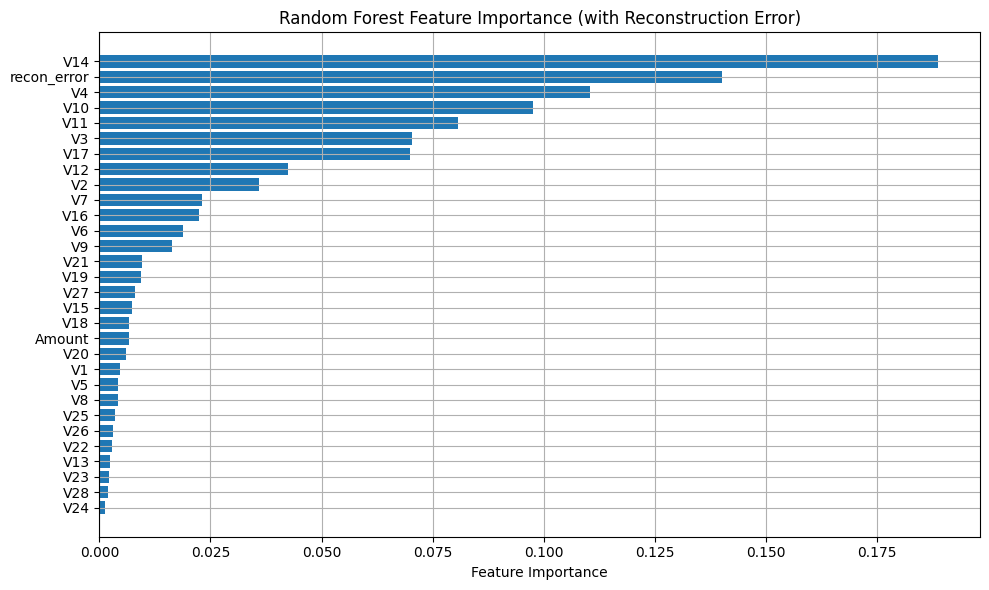

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt

# Step 1: Train base Random Forest model
rf = RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42)
rf.fit(X_train_hybrid, y_train_hybrid)

# Step 2: Calibrate it ( for probability predictions)
calibrated_rf = CalibratedClassifierCV(estimator=rf, method='isotonic', cv=3)
calibrated_rf.fit(X_train_hybrid, y_train_hybrid)

# Step 3: Get feature importances
importances = rf.feature_importances_
feature_names = df.drop('Class', axis=1).columns

# Step 4: Plot feature importances
plt.figure(figsize=(10, 6))
sorted_idx = importances.argsort()
plt.barh(range(len(importances)), importances[sorted_idx])
plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance (with Reconstruction Error)")
plt.tight_layout()
plt.grid(True)
plt.show()


explaination for  feature importance analysis: autoencoder is adding value: recon_error is the 2nd most important feature, meaning the model finds it useful to distinguish between normal and fraudulent transactions.



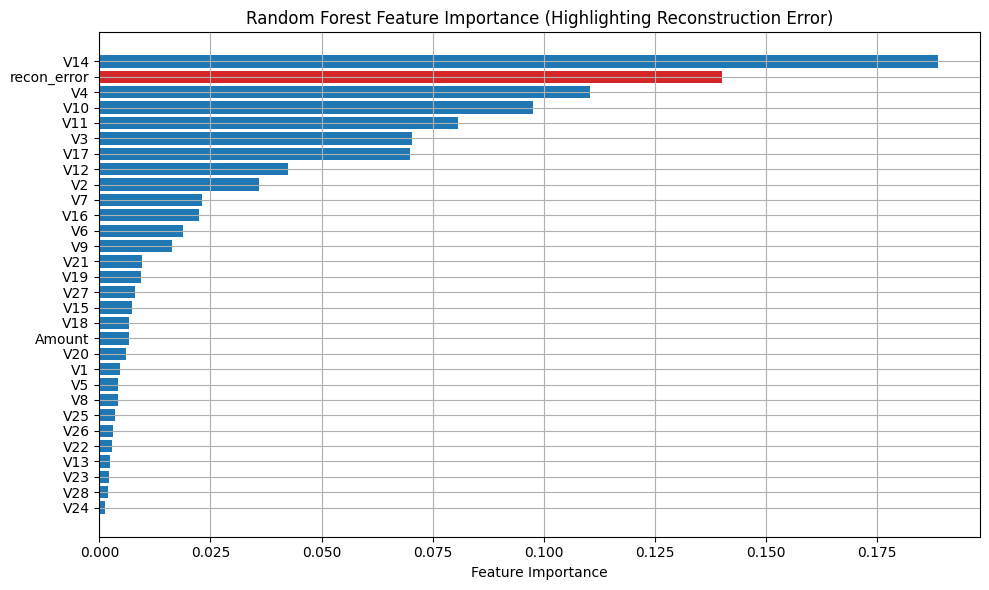

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort features by importance
sorted_idx = importances.argsort()
sorted_importances = importances[sorted_idx]
sorted_features = [feature_names[i] for i in sorted_idx]

# Choose bar colors: default blue, except 'recon_error' → red
colors = ['tab:blue' if f != 'recon_error' else 'tab:red' for f in sorted_features]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances)), sorted_importances, color=colors)
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance (Highlighting Reconstruction Error)")
plt.tight_layout()
plt.grid(True)
plt.show()


Explaination:
“This chart ranks all features based on how much they contribute to the Random Forest classifier’s decision-making. As shown, recon_error — the output of our autoencoder — is the second most important feature. This confirms that our autoencoder effectively captures anomalies associated with fraud, adding significant value to the overall prediction model.”

In [ ]:
# STEP 8: Evaluation
y_pred = calibrated_rf.predict(X_test_hybrid)
y_prob = calibrated_rf.predict_proba(X_test_hybrid)[:, 1]

precision = precision_score(y_test_hybrid, y_pred)
recall = recall_score(y_test_hybrid, y_pred)
f1 = f1_score(y_test_hybrid, y_pred)
roc_auc = roc_auc_score(y_test_hybrid, y_prob)

print(f"✅ Calibrated Random Forest Hybrid Results")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

✅ Calibrated Random Forest Hybrid Results
Precision: 0.9677
Recall:    0.9091
F1 Score:  0.9375
ROC AUC:   0.9997


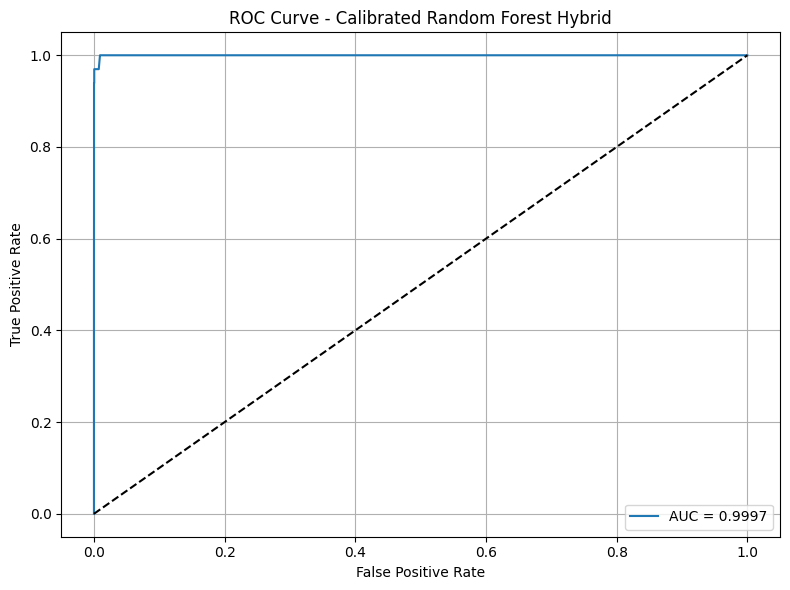

In [ ]:
# STEP 9: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test_hybrid, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Calibrated Random Forest Hybrid')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

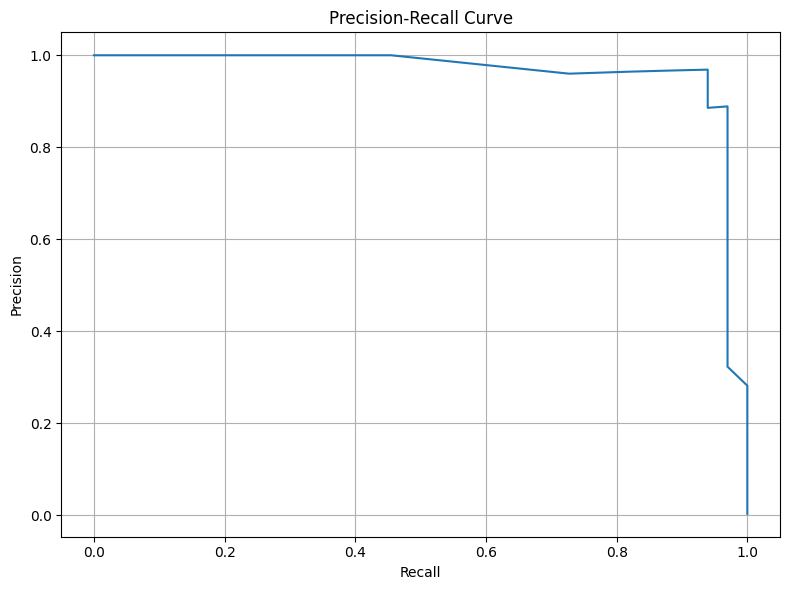

In [ ]:
#3. Precision-Recall Curve
#Especially useful for imbalanced datasets like fraud detection.
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test_hybrid, y_prob)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.tight_layout()
plt.show()

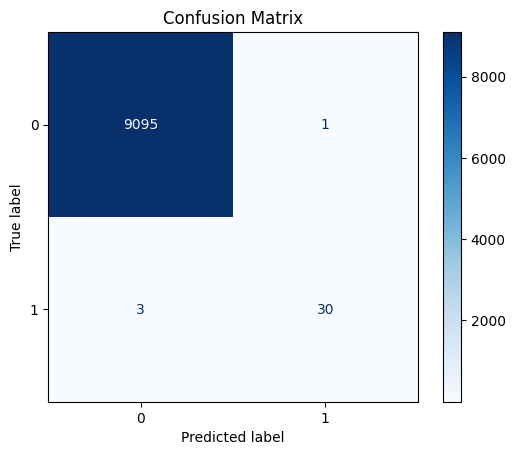

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_hybrid, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()